In [4]:
import pandas as pd

df = pd.read_csv('../data/cubes.csv', low_memory=False)
df.dtypes

Unnamed: 0               int64
Cube ID                  int64
Timestamp                int64
Temperature Layer A     object
Temperature Layer B     object
Door                   float64
Humidity Layer A        object
Humidity Layer B        object
dtype: object

In [2]:
df = df.drop(columns=['Unnamed: 0','Door']) # exclude index and unnecessary columns

df['Timestamp'] = df['Timestamp'] - df['Timestamp'].min() # move the timer to the start

df['Temperature Layer A'] = df['Temperature Layer A'].str.replace('°C', '').astype(float)
df['Temperature Layer B'] = df['Temperature Layer B'].str.replace('°C', '').astype(float)
#cast data from text to numeric

df['Humidity Layer A'] = df['Humidity Layer A'].str.replace('g/m3', '').astype(float)
df['Humidity Layer B'] = df['Humidity Layer B'].str.replace('g/m3', '').astype(float)
#cast data from text to numeric

df = df.dropna(how='all', subset=[
    'Temperature Layer A',
    'Temperature Layer B',
    'Humidity Layer A',
    'Humidity Layer B'
    ])
# clear data from empty rows

df

,Cube ID,Timestamp,Temperature Layer A,Temperature Layer B,Humidity Layer A,Humidity Layer B
1,95,1,NaN,25.711898671792053,NaN,NaN
3,55,1,NaN,NaN,NaN,8.594411333817883
6,73,6,23.776610608962223,NaN,NaN,NaN
8,94,7,NaN,22.756073579910378,NaN,NaN
9,99,9,NaN,NaN,NaN,9.352421050043962
...,...,...,...,...,...,...
400175,6,4316871,16.778937348099618,NaN,NaN,NaN
400176,92,4316880,20.487615539494776,NaN,NaN,NaN
400177,35,4316882,19.234518635089938,NaN,NaN,NaN
400178,98,4316884,17.53351243632445,NaN,NaN,NaN


TypeError: 'value' must be an instance of str or bytes, not a float

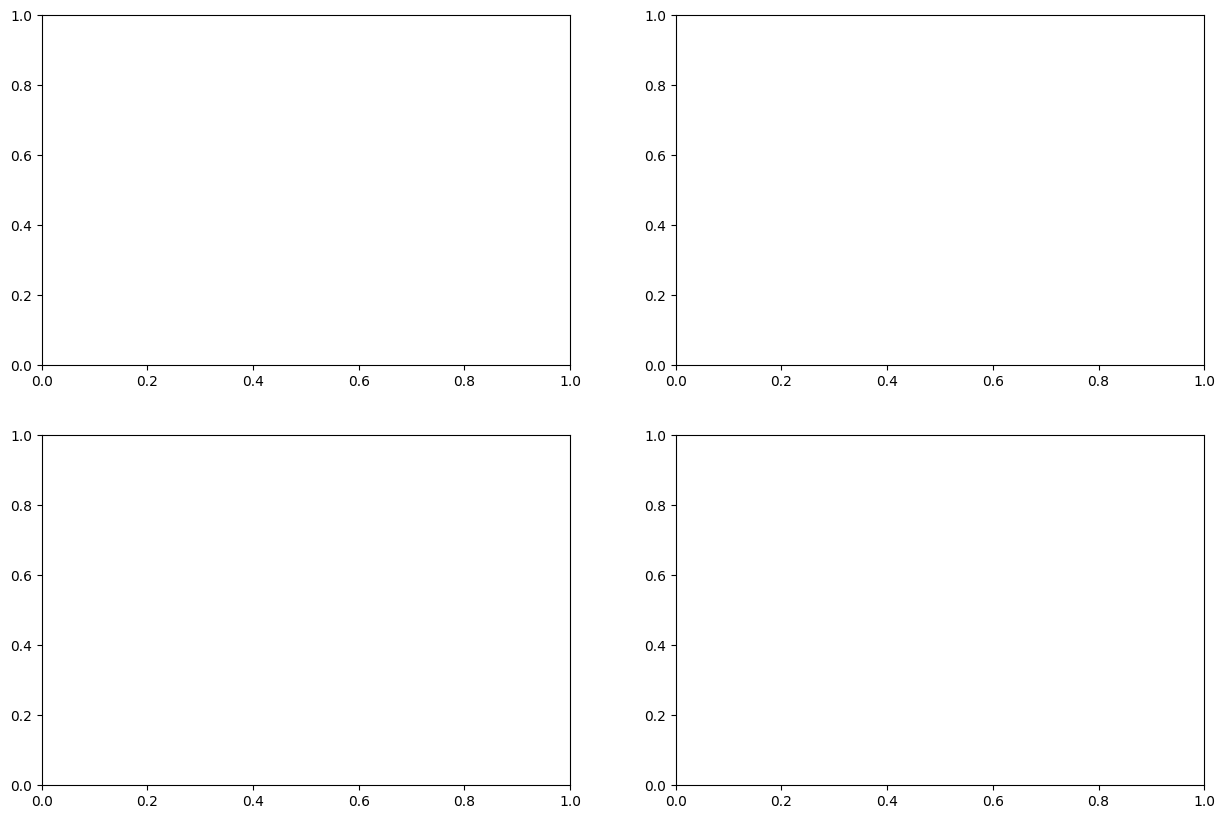

In [3]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 10]

bins = 100

fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(df['Temperature Layer A'].values, bins=bins)
axs[0, 0].set_title('Temperature Layer A')

axs[0, 1].hist(df['Temperature Layer B'].values, bins=bins)
axs[0, 1].set_title('Temperature Layer B')

axs[1, 0].hist(df['Humidity Layer A'].values, bins=bins)
axs[1, 0].set_title('Humidity Layer A')

axs[1, 1].hist(df['Humidity Layer B'].values, bins=bins)
axs[1, 1].set_title('Humidity Layer B')

plt.show()

In [ ]:
import numpy as np

df['Humidity Layer A'] = [x if x < 25 else np.nan for x in df['Humidity Layer A']]
df['Humidity Layer B'] = [x if x < 25 else np.nan for x in df['Humidity Layer B']]
# clear humidity from outliers

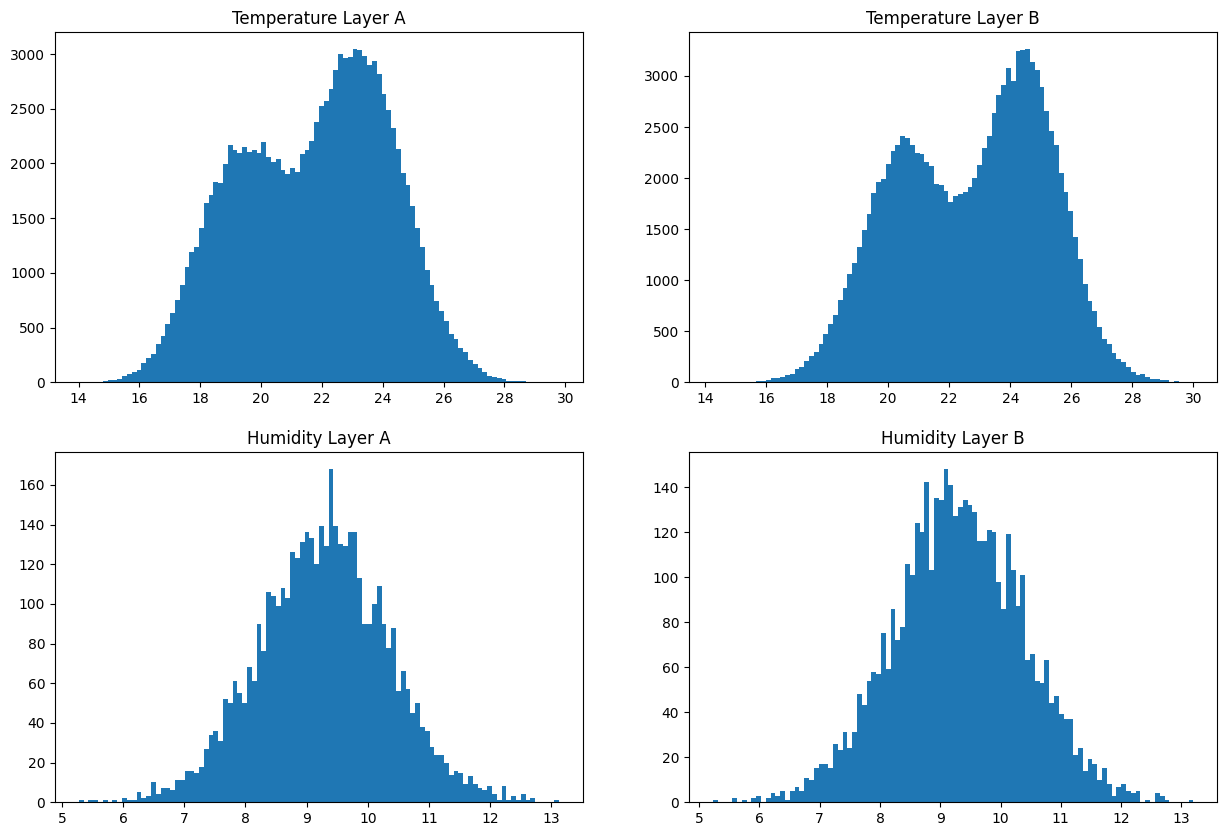

In [ ]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(df['Temperature Layer A'].values, bins=bins)
axs[0, 0].set_title('Temperature Layer A')

axs[0, 1].hist(df['Temperature Layer B'].values, bins=bins)
axs[0, 1].set_title('Temperature Layer B')

axs[1, 0].hist(df['Humidity Layer A'].values, bins=bins)
axs[1, 0].set_title('Humidity Layer A')

axs[1, 1].hist(df['Humidity Layer B'].values, bins=bins)
axs[1, 1].set_title('Humidity Layer B')

plt.show()

In [ ]:
df.to_csv('../data/cubes_processed.csv', index=False) # save data, disable indexing